In [46]:
# 01_data_exploration.ipynb

import sys, os

# Get current working directory (where the notebook is)
notebook_dir = os.getcwd()

# Go one level up to reach the project root
project_root = os.path.abspath(os.path.join(notebook_dir, '..'))

# Add it to the system path if not already there
if project_root not in sys.path:
    sys.path.append(project_root)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Custom modules
from src.data_loader import fetch_stock_data, update_data
from src.preprocessing import load_and_clean
from src.utils import *

sns.set(style="darkgrid")
plt.rcParams['figure.figsize'] = (14, 6)

In [47]:
# -------------------------------
# 1️⃣ Load Data from Yahoo Finance
# -------------------------------

tickers = ["BBVA.MC", "SAB.MC"]
start_date = "2005-01-01"  # 20+ years ago
end_date = datetime.today().strftime("%Y-%m-%d")

data_dict = {}

for ticker in tickers:
    print(f"Fetching data for {ticker}...")
    df = fetch_stock_data(ticker, start_date=start_date, end_date=end_date)
    df_clean = load_and_clean(f"/Users/frankllonch/Desktop/quattroporte/aprendizado de máquina/bbvavssabadells/data/raw/{ticker}_data.csv")
    data_dict[ticker] = df_clean
    print(f"✅ {ticker} data shape: {df_clean.shape}\n")



/Users/frankllonch/Desktop/quattroporte/aprendizado de máquina/bbvavssabadells/src/data_loader.py:13: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed
/Users/frankllonch/Desktop/quattroporte/aprendizado de máquina/bbvavssabadells/src/data_loader.py:13: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed

Fetching data for BBVA.MC...
✅ Saved BBVA.MC data to /Users/frankllonch/Desktop/quattroporte/aprendizado de máquina/bbvavssabadells/data/raw/BBVA.MC_data.csv
✅ BBVA.MC data shape: (5331, 5)

Fetching data for SAB.MC...
✅ Saved SAB.MC data to /Users/frankllonch/Desktop/quattroporte/aprendizado de máquina/bbvavssabadells/data/raw/SAB.MC_data.csv
✅ SAB.MC data shape: (5331, 5)



In [48]:
# -------------------------------
# 2️⃣ Quick Look at Data
# -------------------------------

for ticker, df in data_dict.items():
    print(f"--- {ticker} ---")
    display(df.head())
    display(df.describe())
    print("\n")

--- BBVA.MC ---


,Open,High,Low,Close,Volume
Date,,,,,
NaT,BBVA.MC,BBVA.MC,BBVA.MC,BBVA.MC,BBVA.MC
2005-01-03,4.419319869137833,4.480275884712357,4.405773901147238,4.4464111328125,78806237
2005-01-04,4.446410361247576,4.456569919515897,4.409159544005608,4.422705173492432,250267709
2005-01-05,4.4227069362452704,4.402388483916735,4.358364498231567,4.3990020751953125,71712431
2005-01-06,4.3990020751953125,4.3990020751953125,4.3990020751953125,4.3990020751953125,0


,Open,High,Low,Close,Volume
count,5331,5331,5331,5331,5331
unique,5306,5293,5299,4906,5324
top,16.299999237060547,13.375,16.045000076293945,4.3815999031066895,0
freq,3,3,3,4,8




--- SAB.MC ---


,Open,High,Low,Close,Volume
Date,,,,,
NaT,SAB.MC,SAB.MC,SAB.MC,SAB.MC,SAB.MC
2005-01-03,1.185183130825274,1.1989644357294769,1.185183130825274,1.1920740604400635,8324101
2005-01-04,1.1920745751579827,1.1989649534225464,1.1920745751579827,1.1989649534225464,1737024
2005-01-05,1.1989644357294769,1.1989644357294769,1.1920740604400635,1.1920740604400635,1893998
2005-01-06,1.1920740604400635,1.1920740604400635,1.1920740604400635,1.1920740604400635,0


,Open,High,Low,Close,Volume
count,5331,5331,5331,5331,5331
unique,5133,5081,5083,4250,5324
top,1.3161051273345947,1.4802456488619704,1.480245260625659,1.4732630252838135,0
freq,9,12,12,27,8


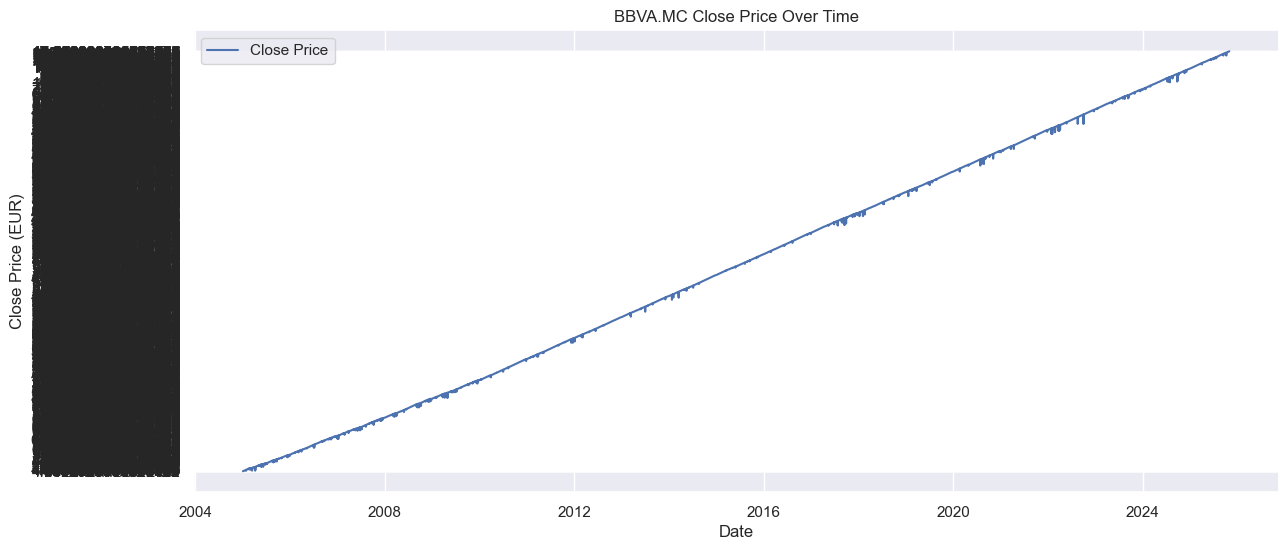

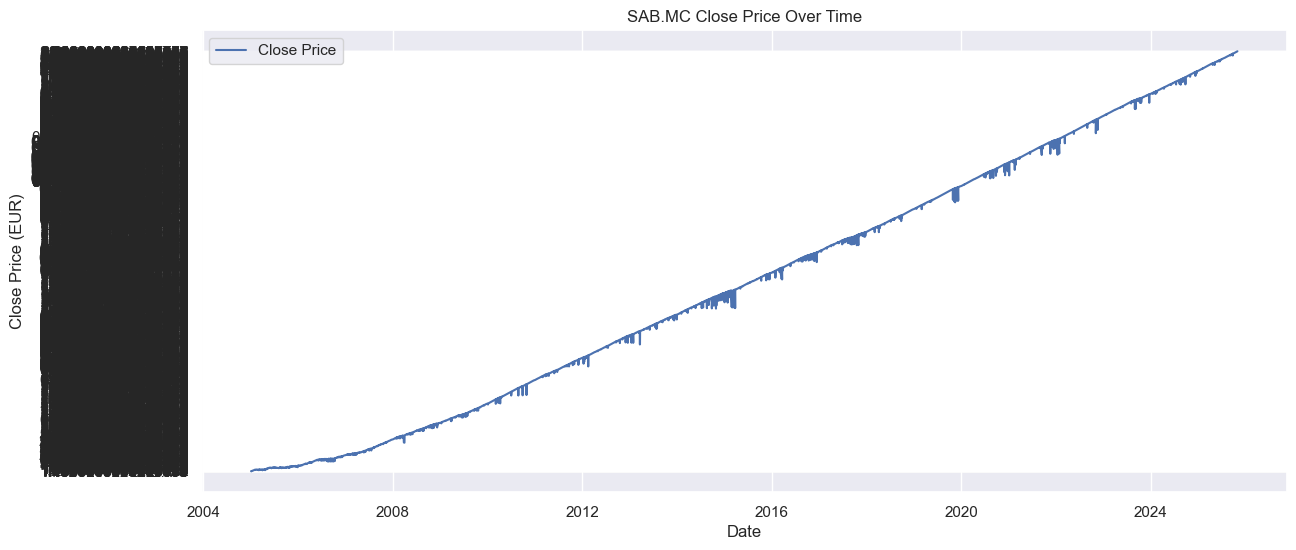

In [49]:
# -------------------------------
# 3️⃣ Visualizations
# -------------------------------

for ticker, df in data_dict.items():
    plt.figure()
    plt.plot(df.index, df['Close'], label='Close Price')
    plt.title(f'{ticker} Close Price Over Time')
    plt.xlabel('Date')
    plt.ylabel('Close Price (EUR)')
    plt.legend()
    plt.show()


Missing Data Visualization for BBVA.MC


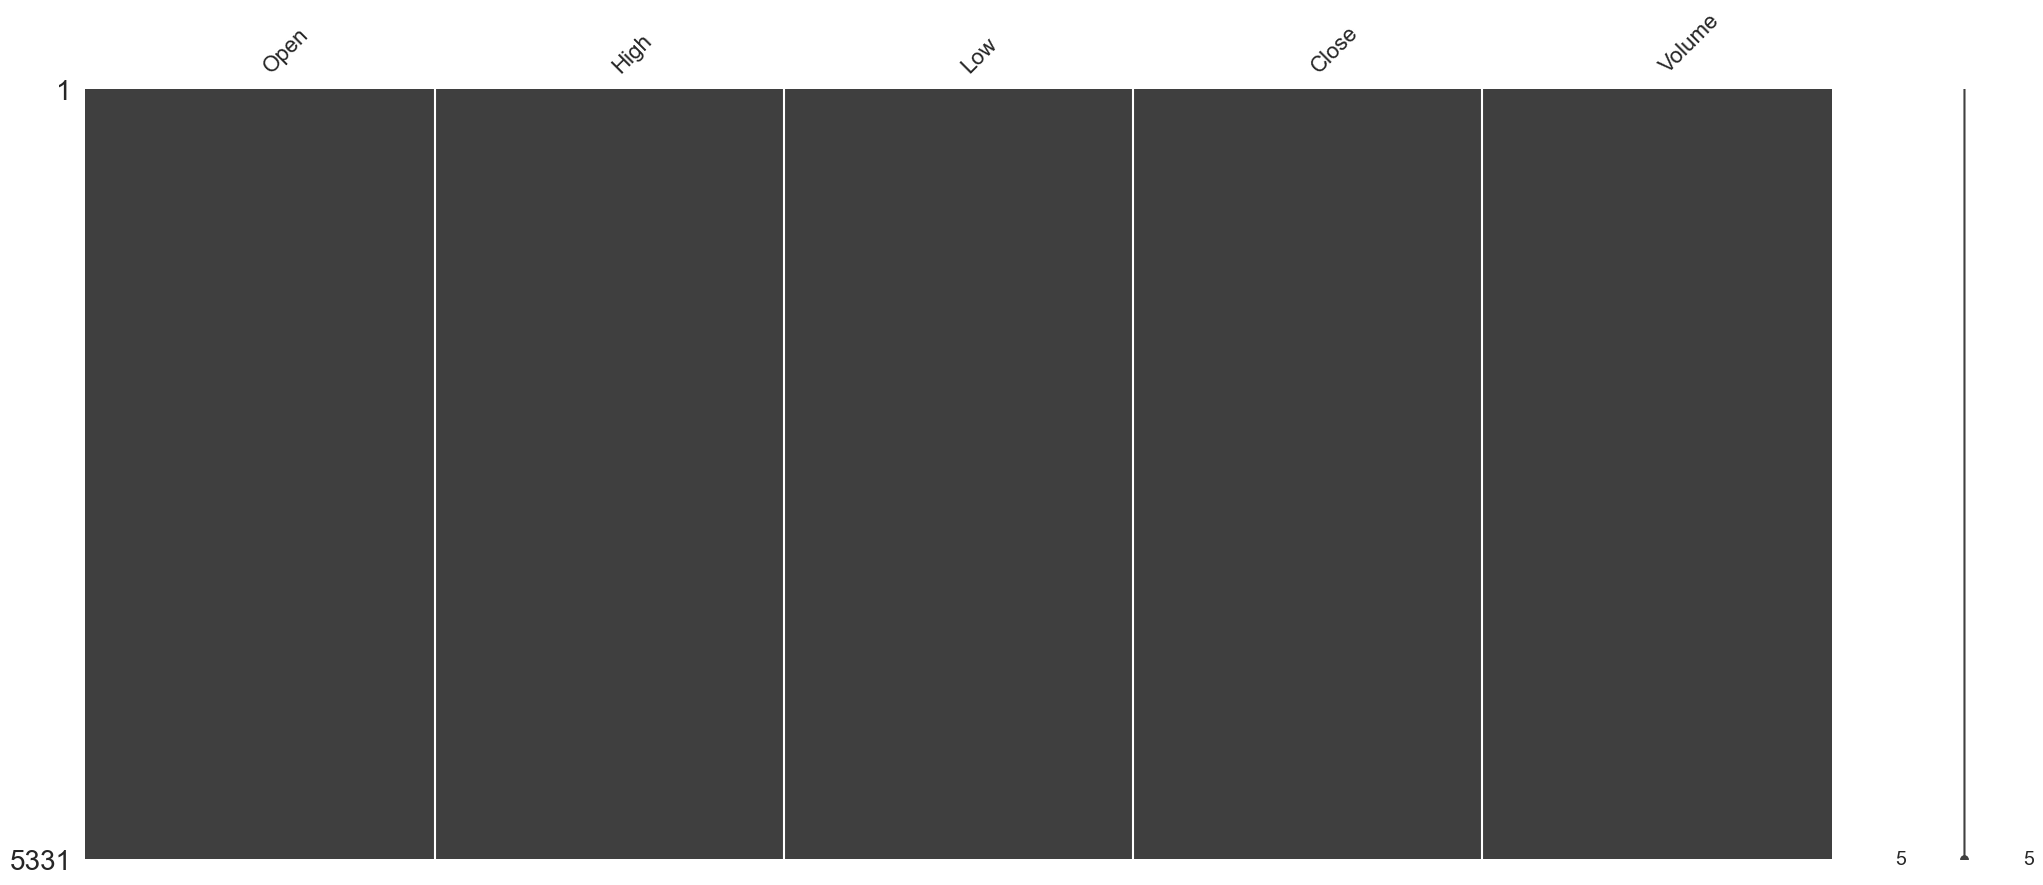

/Users/frankllonch/Desktop/quattroporte/aprendizado de máquina/bbvavssabadells/bbva/lib/python3.11/site-packages/seaborn/matrix.py:309: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
/Users/frankllonch/Desktop/quattroporte/aprendizado de máquina/bbvavssabadells/bbva/lib/python3.11/site-packages/seaborn/matrix.py:309: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


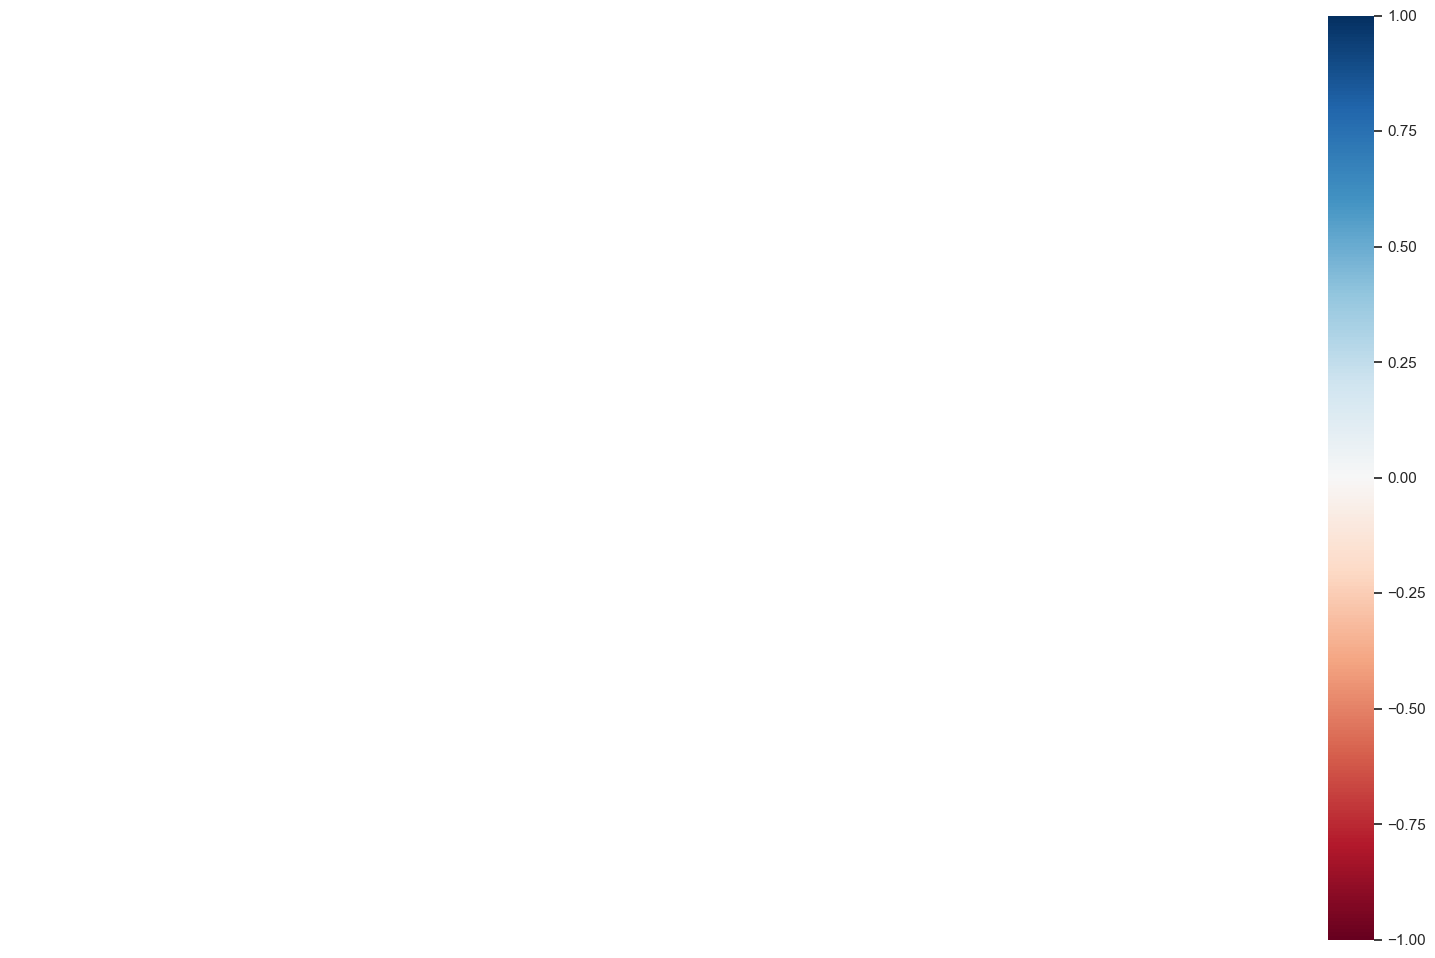

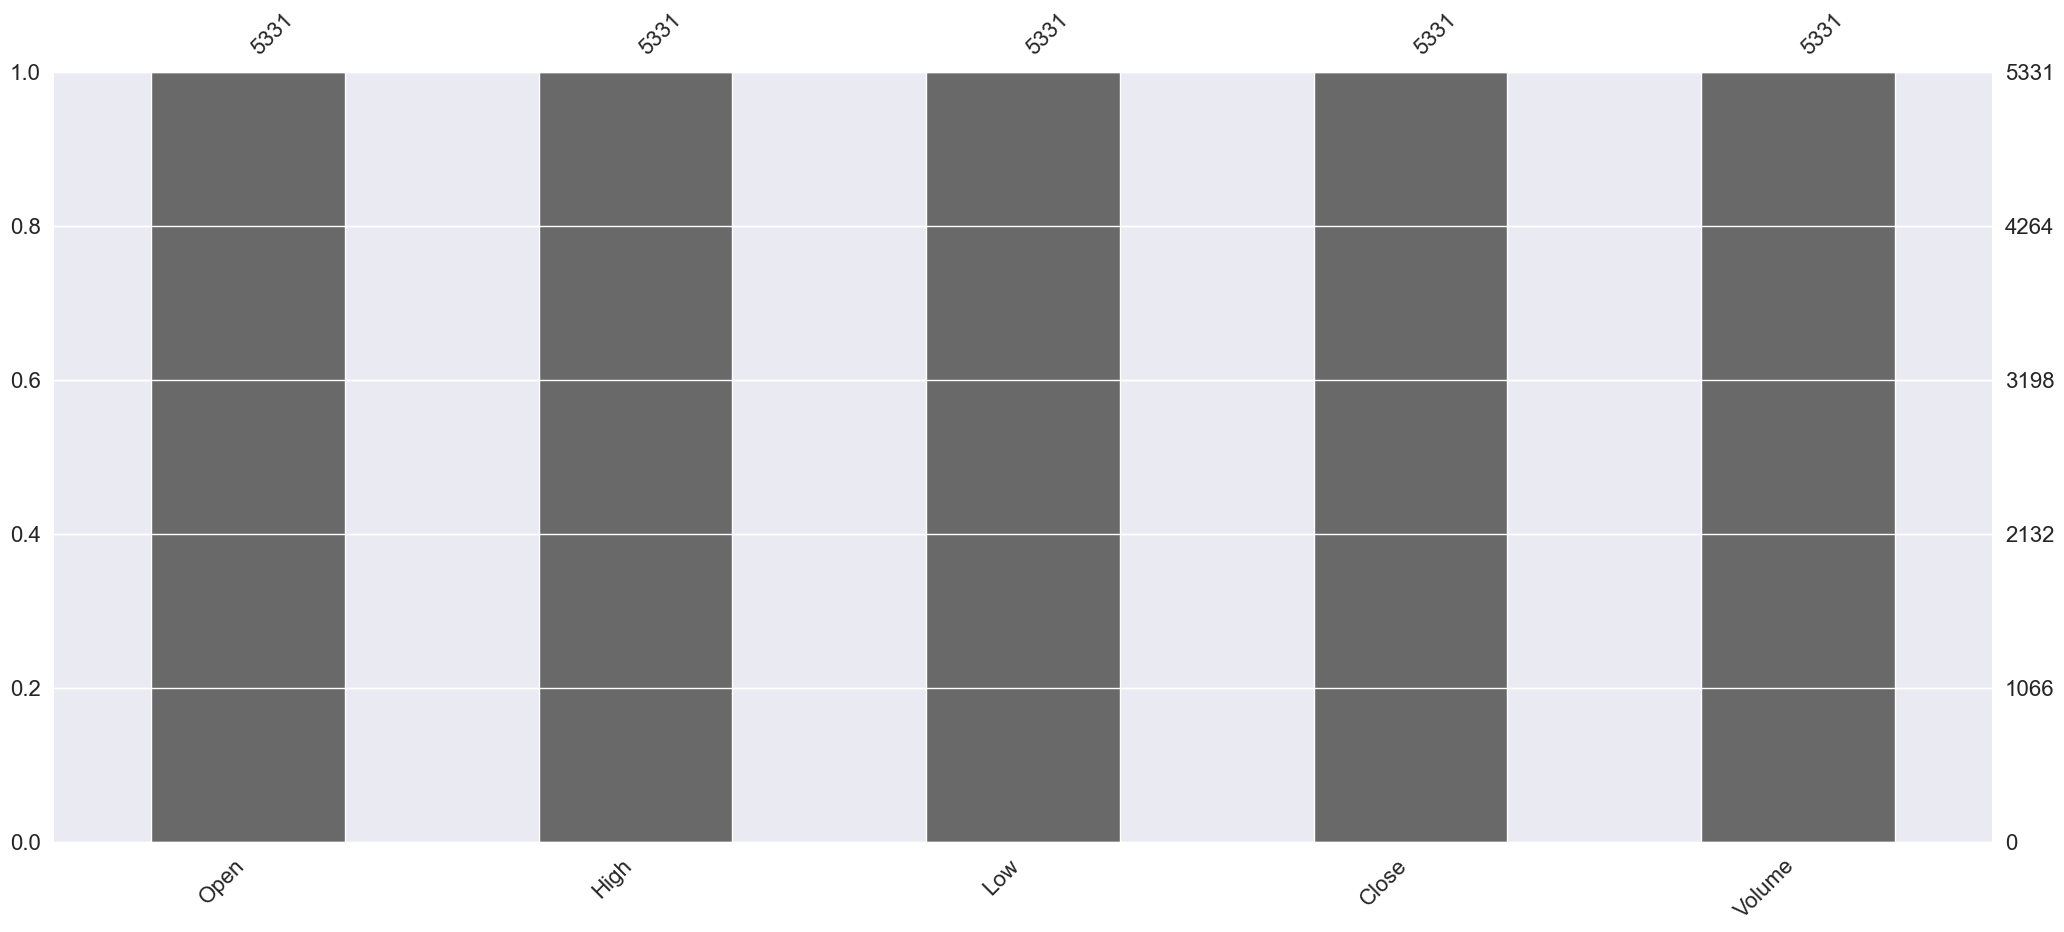

Missing Data Visualization for SAB.MC


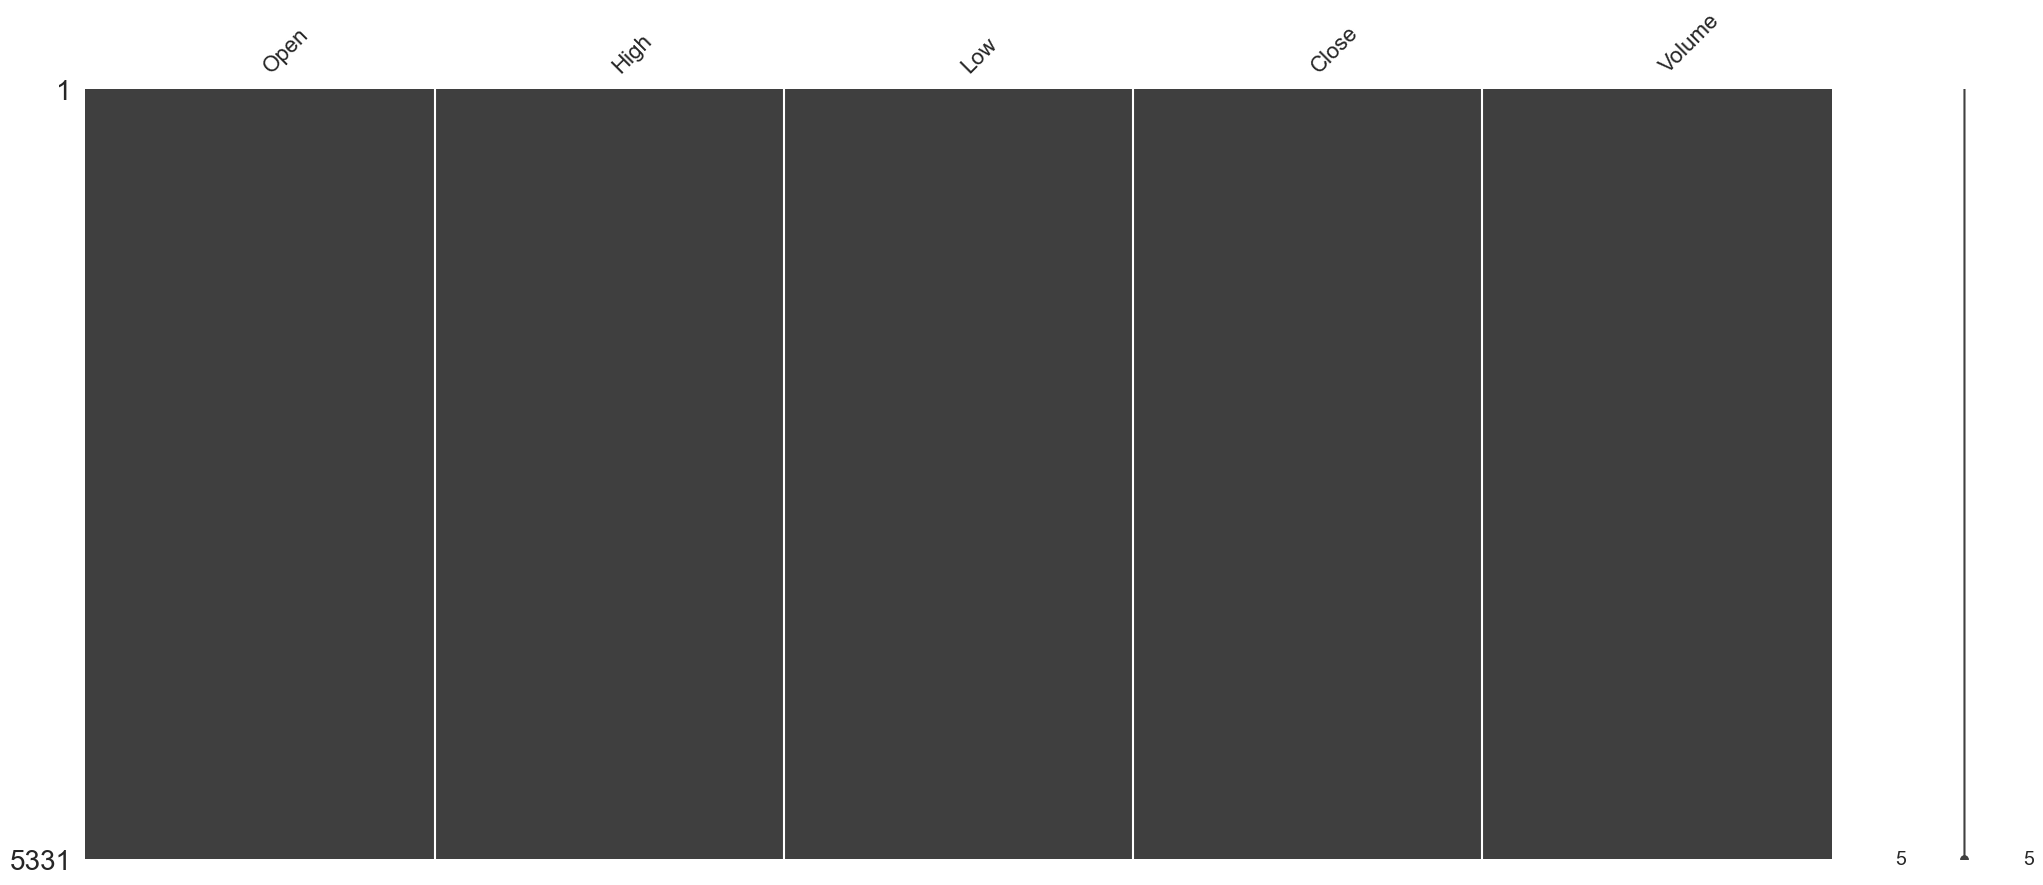

/Users/frankllonch/Desktop/quattroporte/aprendizado de máquina/bbvavssabadells/bbva/lib/python3.11/site-packages/seaborn/matrix.py:309: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
/Users/frankllonch/Desktop/quattroporte/aprendizado de máquina/bbvavssabadells/bbva/lib/python3.11/site-packages/seaborn/matrix.py:309: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


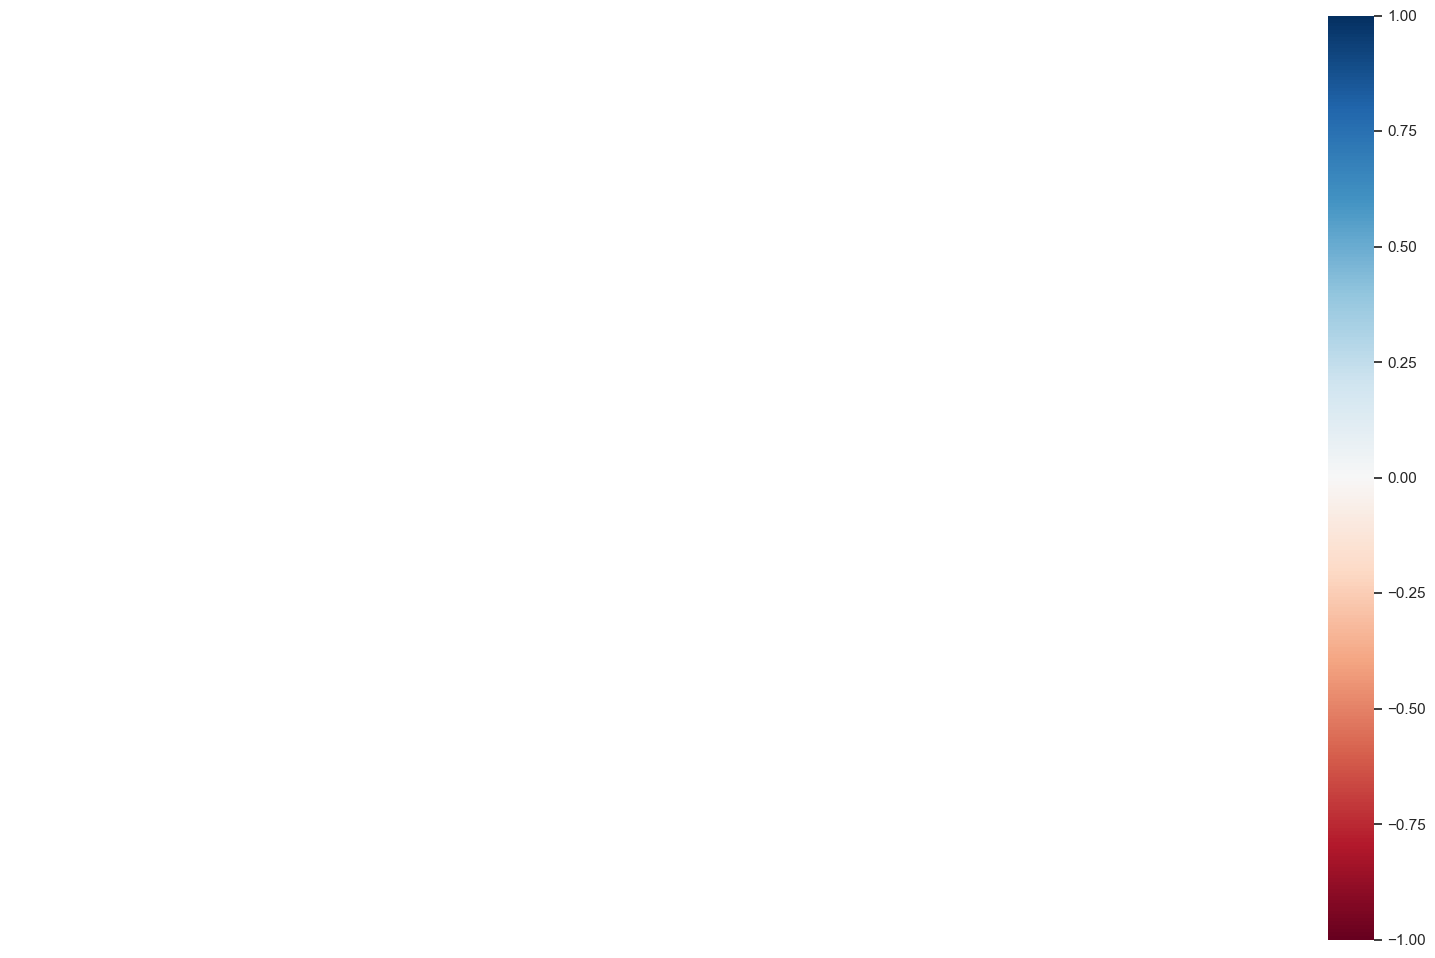

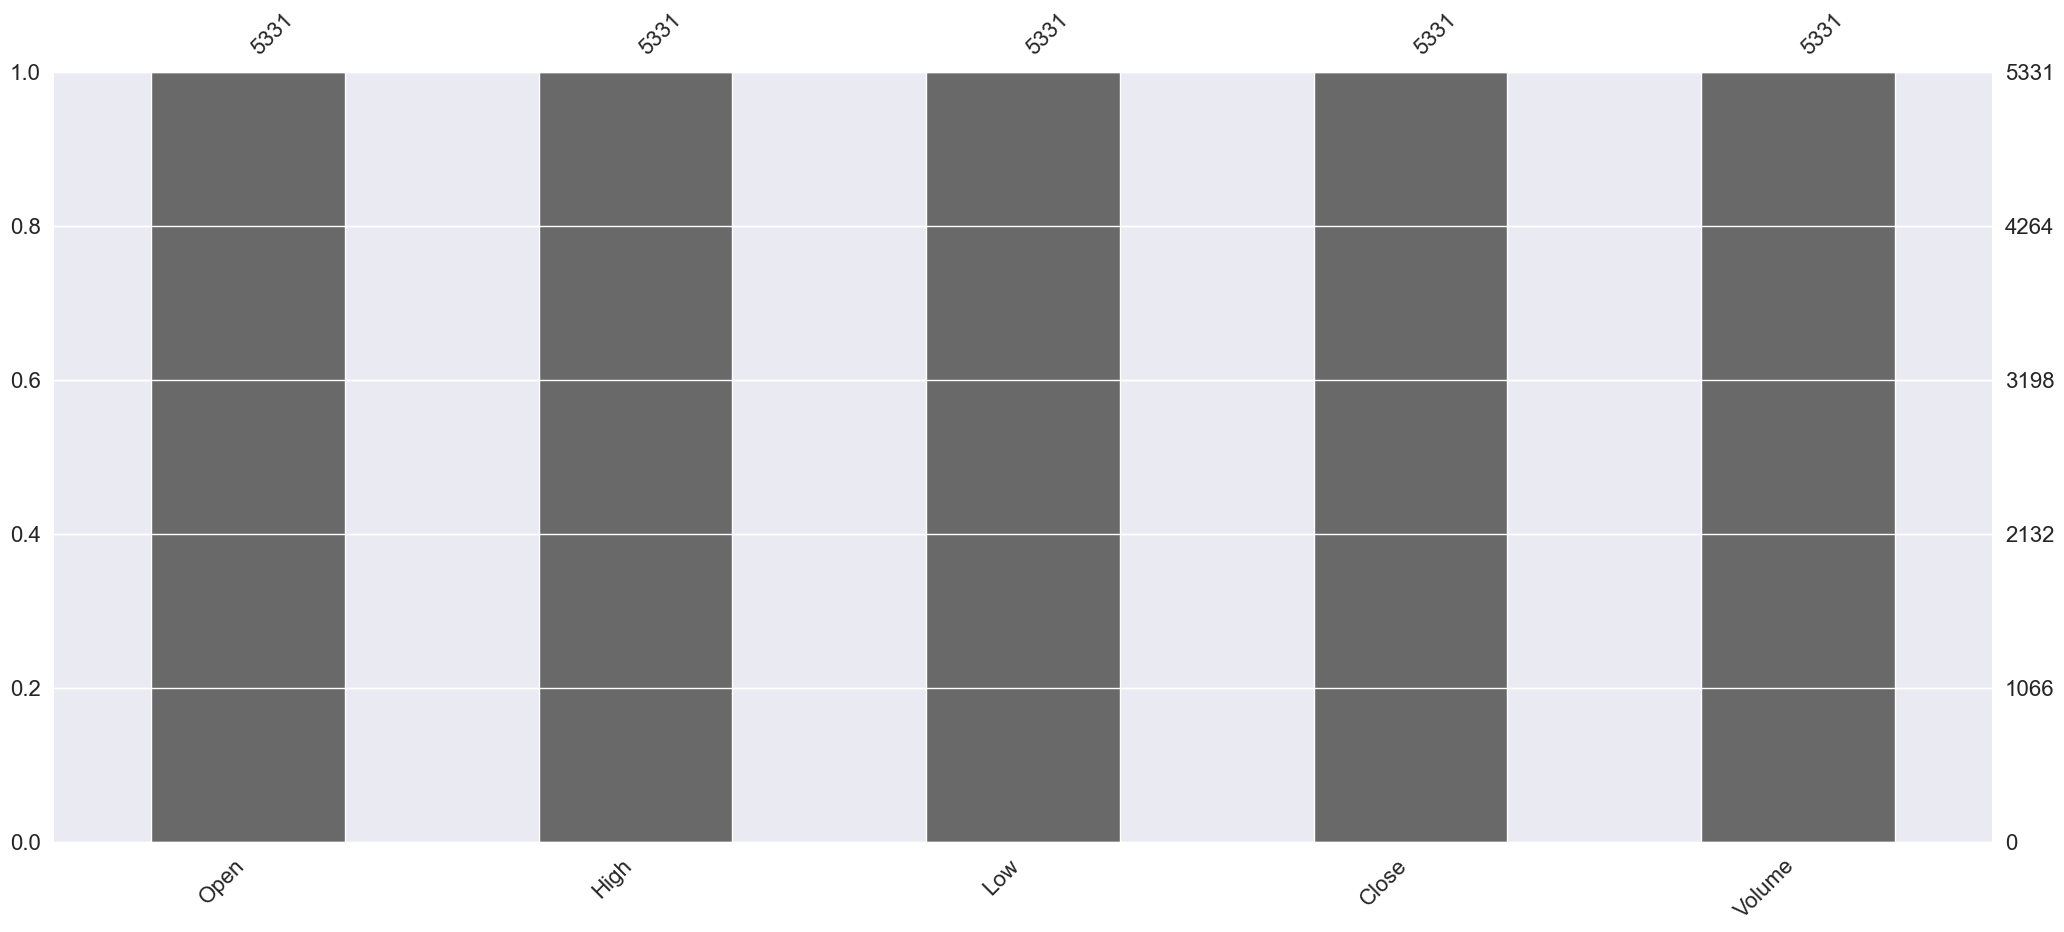

In [50]:
import missingno as msno

for ticker, df in data_dict.items():
    print(f"Missing Data Visualization for {ticker}")
    msno.matrix(df)
    plt.show()
    msno.heatmap(df)
    plt.show()
    msno.bar(df)
    plt.show()
# -------------------------------


In [51]:
for ticker, df in data_dict.items():
    print(f"\nCleaning {ticker}...")
    
    # Drop empty rows or rows with column names as values
    df = df.dropna(how='all')
    df = df[df['Close'] != 'Close']  # remove header rows accidentally read as data
    
    # Convert numeric columns
    for col in ['Open', 'High', 'Low', 'Close', 'Volume']:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    
    df = df.dropna(subset=['Close'])  # drop rows where Close could not be parsed
    
    # Store back clean df
    data_dict[ticker] = df

    print(df.dtypes)  # optional: check types


Cleaning BBVA.MC...
Open      float64
High      float64
Low       float64
Close     float64
Volume    float64
dtype: object

Cleaning SAB.MC...
Open      float64
High      float64
Low       float64
Close     float64
Volume    float64
dtype: object


BBVA.MC Correlation matrix:
             Open      High       Low     Close    Volume
Open    1.000000  0.999697  0.999616  0.999310 -0.229156
High    0.999697  1.000000  0.999552  0.999664 -0.226822
Low     0.999616  0.999552  1.000000  0.999709 -0.232168
Close   0.999310  0.999664  0.999709  1.000000 -0.229233
Volume -0.229156 -0.226822 -0.232168 -0.229233  1.000000 



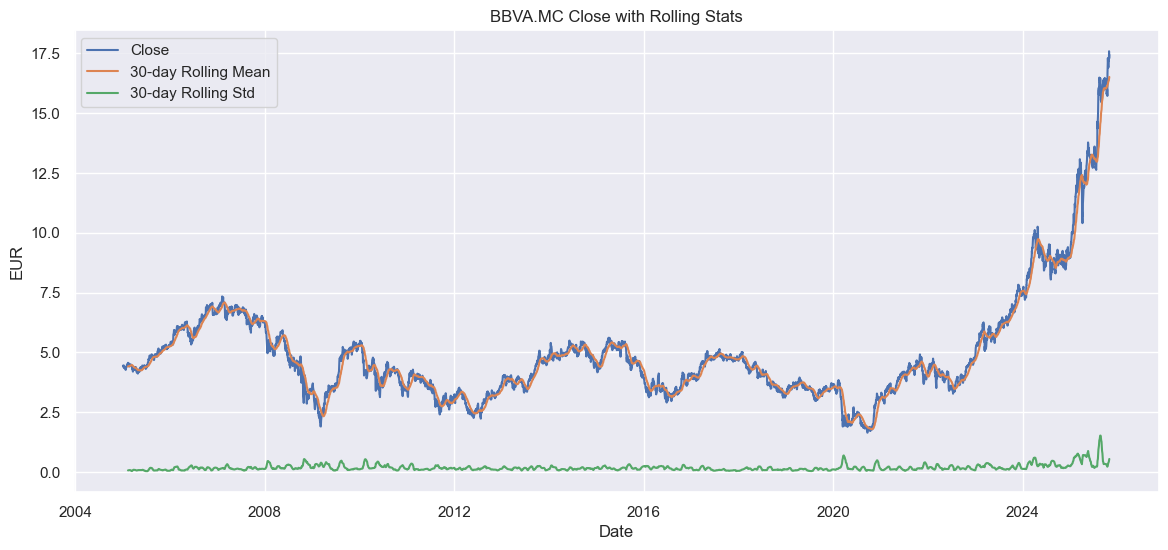

SAB.MC Correlation matrix:
             Open      High       Low     Close    Volume
Open    1.000000  0.999665  0.999608  0.999274 -0.341107
High    0.999665  1.000000  0.999523  0.999669 -0.336186
Low     0.999608  0.999523  1.000000  0.999678 -0.345603
Close   0.999274  0.999669  0.999678  1.000000 -0.341060
Volume -0.341107 -0.336186 -0.345603 -0.341060  1.000000 



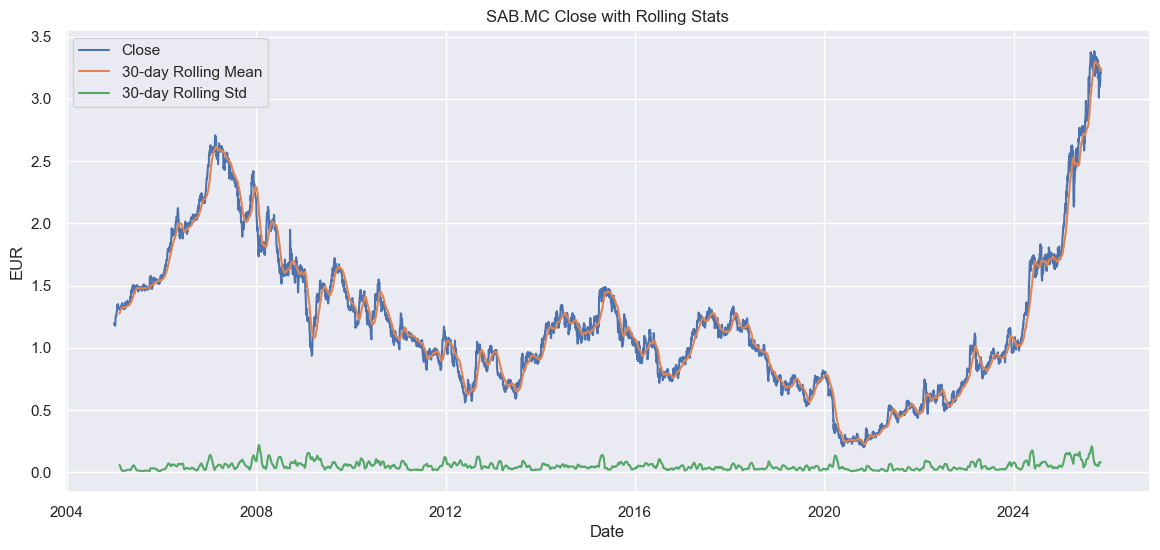

In [52]:
# -------------------------------
# 5️⃣ Correlations & Rolling Statistics
# -------------------------------

for ticker, df in data_dict.items():
    # Select only numeric columns for correlation
    numeric_df = df.select_dtypes(include=['number'])
    print(f"{ticker} Correlation matrix:\n", numeric_df.corr(), "\n")
    
    # Rolling mean & volatility
    df['Close_rolling_mean_30'] = df['Close'].rolling(window=30).mean()
    df['Close_rolling_std_30'] = df['Close'].rolling(window=30).std()
    
    plt.figure()
    plt.plot(df.index, df['Close'], label='Close')
    plt.plot(df.index, df['Close_rolling_mean_30'], label='30-day Rolling Mean')
    plt.plot(df.index, df['Close_rolling_std_30'], label='30-day Rolling Std')
    plt.title(f"{ticker} Close with Rolling Stats")
    plt.xlabel("Date")
    plt.ylabel("EUR")
    plt.legend()
    plt.show()


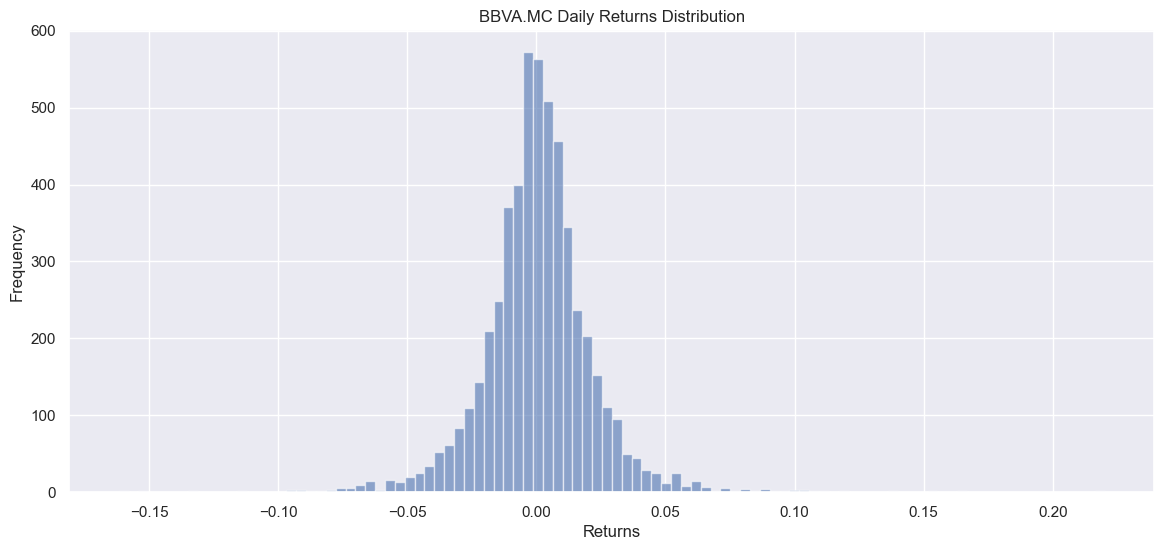

BBVA.MC Returns Summary:
 count    5329.000000
mean        0.000484
std         0.021374
min        -0.161793
25%        -0.009967
50%         0.000391
75%         0.010626
max         0.220271
Name: returns, dtype: float64 



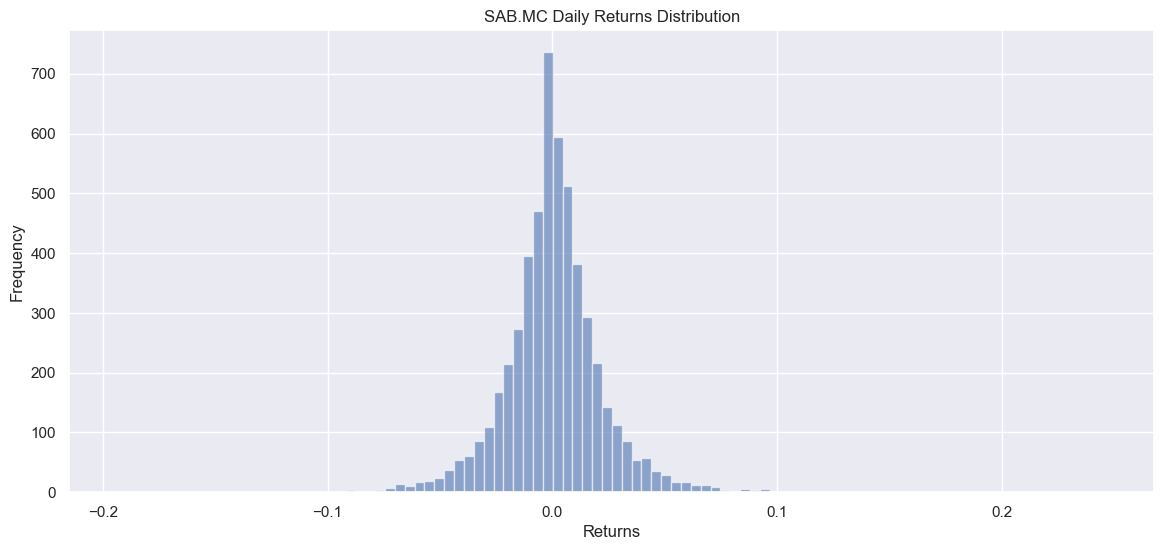

SAB.MC Returns Summary:
 count    5329.000000
mean        0.000458
std         0.023302
min        -0.192924
25%        -0.010257
50%         0.000000
75%         0.010492
max         0.245911
Name: returns, dtype: float64 



In [53]:

# -------------------------------
# 6️⃣ Returns Analysis
# -------------------------------

for ticker, df in data_dict.items():
    df['returns'] = df['Close'].pct_change()
    plt.figure()
    plt.hist(df['returns'].dropna(), bins=100, alpha=0.6)
    plt.title(f"{ticker} Daily Returns Distribution")
    plt.xlabel("Returns")
    plt.ylabel("Frequency")
    plt.show()
    
    print(f"{ticker} Returns Summary:\n", df['returns'].describe(), "\n")

In [54]:
# -------------------------------
# 7️⃣ Save cleaned & enriched data for later notebooks
# -------------------------------

import os
os.makedirs("data/processed", exist_ok=True)

for ticker, df in data_dict.items():
    df.to_csv(f"data/processed/{ticker}_processed.csv")
    print(f"✅ Saved cleaned {ticker} data to data/processed/{ticker}_processed.csv")

✅ Saved cleaned BBVA.MC data to data/processed/BBVA.MC_processed.csv
✅ Saved cleaned SAB.MC data to data/processed/SAB.MC_processed.csv


In [55]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np

def prepare_data_for_model(df, target_col='Close', sequence_length=30):
    # --- Step 1. Feature Engineering ---
    df['returns'] = df['Close'].pct_change()
    df['rolling_mean_30'] = df['Close'].rolling(window=30).mean()
    df['rolling_std_30'] = df['Close'].rolling(window=30).std()
    
    # Add technical indicators (optional)
    import ta
    df['RSI'] = ta.momentum.RSIIndicator(df['Close'], window=14).rsi()
    macd = ta.trend.MACD(df['Close'])
    df['MACD'] = macd.macd()
    df['MACD_signal'] = macd.macd_signal()
    bb = ta.volatility.BollingerBands(df['Close'])
    df['Bollinger_high'] = bb.bollinger_hband()
    df['Bollinger_low'] = bb.bollinger_lband()
    
    # --- Step 2. Clean up ---
    df.dropna(inplace=True)  # removes NaNs from rolling & indicators

    # --- Step 3. Feature Scaling ---
    scaler = StandardScaler()
    feature_cols = [col for col in df.columns if col != target_col]
    df[feature_cols] = scaler.fit_transform(df[feature_cols])

    # --- Step 4. Create sequences for RNN ---
    X, y = [], []
    data = df[feature_cols].values
    target = df[target_col].values

    for i in range(sequence_length, len(df)):
        X.append(data[i-sequence_length:i])   # past 30 days
        y.append(target[i])                   # next day's price (or return)

    X, y = np.array(X), np.array(y)

    # --- Step 5. Train/test split (chronological) ---
    split = int(len(X) * 0.8)
    X_train, X_test = X[:split], X[split:]
    y_train, y_test = y[:split], y[split:]

    return X_train, X_test, y_train, y_test, scaler

In [57]:
for ticker, df in data_dict.items():
    X_train, X_test, y_train, y_test, scaler = prepare_data_for_model(df, target_col='Close', sequence_length=30)
    
    np.save(f"/Users/frankllonch/Desktop/quattroporte/aprendizado de máquina/bbvavssabadells/data/processed/X_train_{ticker}.npy", X_train)
    np.save(f"/Users/frankllonch/Desktop/quattroporte/aprendizado de máquina/bbvavssabadells/data/processed/X_test_{ticker}.npy", X_test)
    np.save(f"/Users/frankllonch/Desktop/quattroporte/aprendizado de máquina/bbvavssabadells/data/processed/y_train_{ticker}.npy", y_train)
    np.save(f"/Users/frankllonch/Desktop/quattroporte/aprendizado de máquina/bbvavssabadells/data/processed/y_test_{ticker}.npy", y_test)

    print(f"✅ Saved processed data for {ticker}")

✅ Saved processed data for BBVA.MC
✅ Saved processed data for SAB.MC
